In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.8 MB/s eta 0:00:00
   ━━

[LightGBM] [Info] Number of positive: 56280, number of negative: 213361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.194452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 269641, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208722 -> initscore=-1.332646
[LightGBM] [Info] Start training from score -1.332646


,Description,Value
0,Session id,6238
1,Target,breast_cancer_history
2,Target type,Binary
3,Original data shape,"(385202, 11)"
4,Transformed data shape,"(385202, 3)"
5,Transformed train set shape,"(269641, 3)"
6,Transformed test set shape,"(115561, 3)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7913,0.6754,0.0000,0.0000,0.0000,0.0000,0.0000,3.7010
dt,Decision Tree Classifier,0.7913,0.6781,0.0000,0.0000,0.0000,0.0000,0.0000,2.7440
svm,SVM - Linear Kernel,0.7913,0.6571,0.0000,0.0000,0.0000,0.0000,0.0000,3.6760
ridge,Ridge Classifier,0.7913,0.6756,0.0000,0.0000,0.0000,0.0000,0.0000,2.7390
rf,Random Forest Classifier,0.7913,0.6781,0.0000,0.0000,0.0000,0.0000,0.0000,10.3470
ada,Ada Boost Classifier,0.7913,0.6775,0.0000,0.0000,0.0000,0.0000,0.0000,5.7310
gbc,Gradient Boosting Classifier,0.7913,0.6783,0.0000,0.0000,0.0000,0.0000,0.0000,10.1590
lda,Linear Discriminant Analysis,0.7913,0.6756,0.0000,0.0000,0.0000,0.0000,0.0000,2.8330
et,Extra Trees Classifier,0.7913,0.6781,0.0000,0.0000,0.0000,0.0000,0.0000,8.6020
xgboost,Extreme Gradient Boosting,0.7913,0.6782,0.0000,0.0000,0.0000,0.0000,0.0000,4.0210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

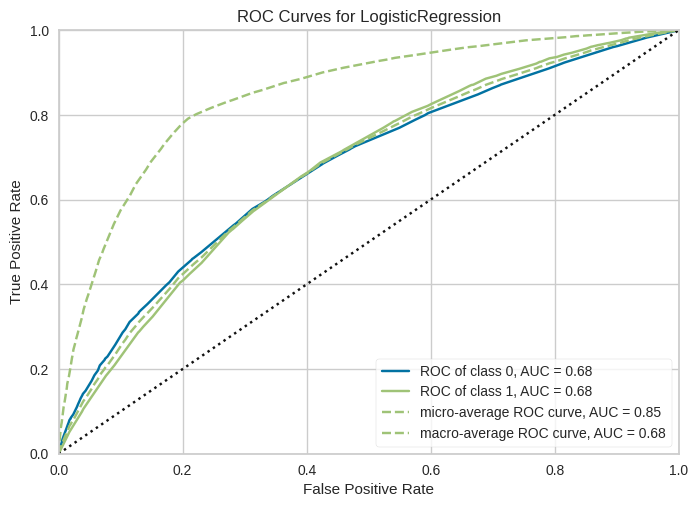

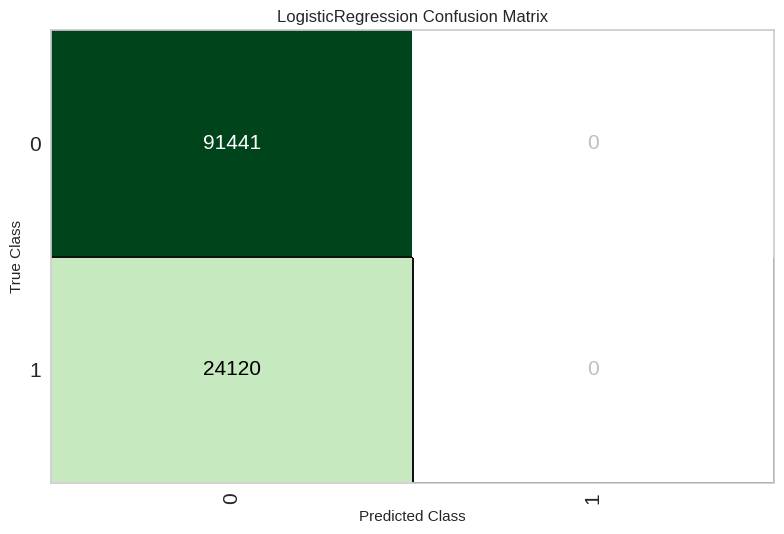

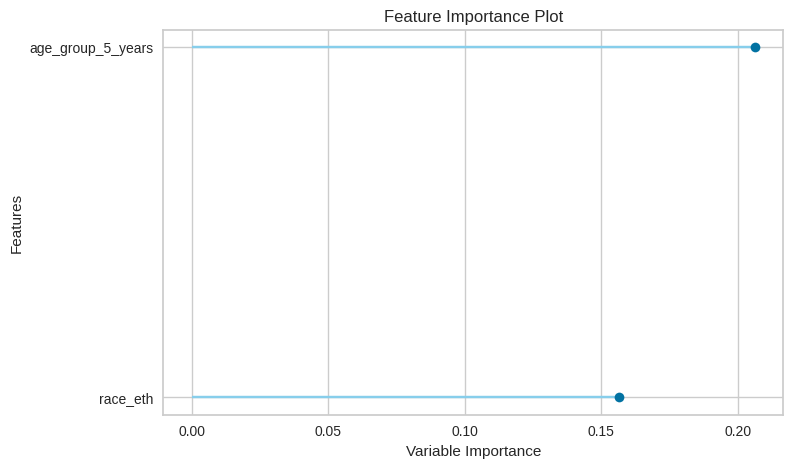

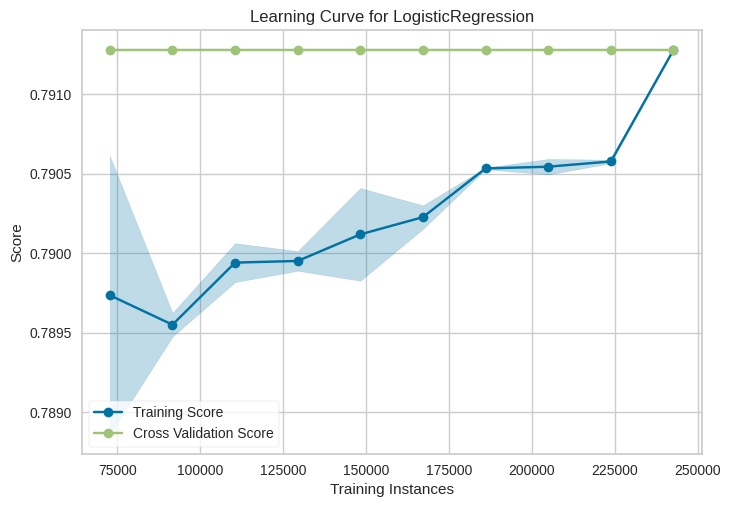

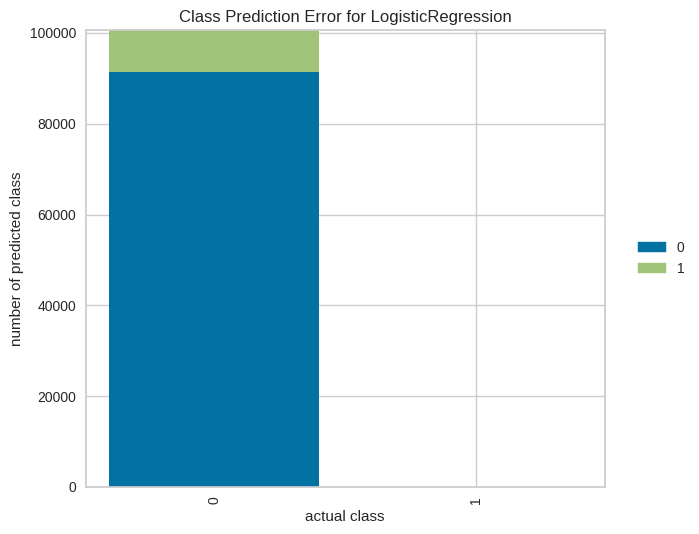

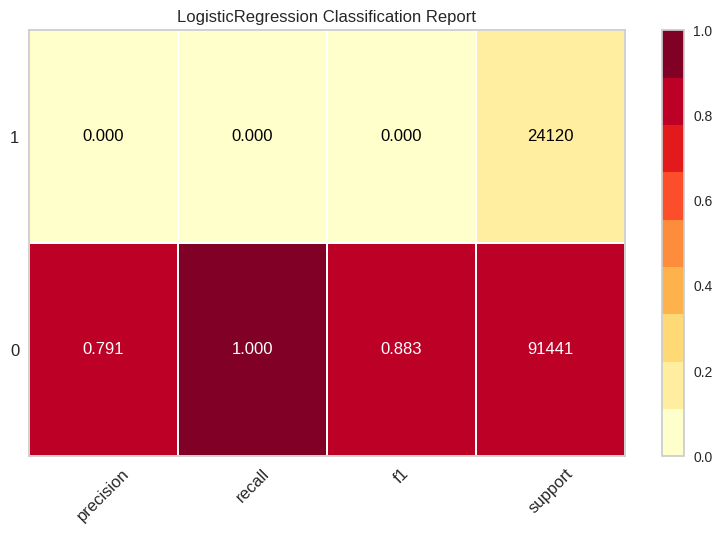

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age_group_5_years', 'race_eth',
                                              'first_degree_hx', 'age_menarche',
                                              'age_first_birth',
                                              'BIRADS_breast_density',
                                              'current_hrt', 'menopaus',
                                              'bmi_group', 'biophx'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                                                                 importance_getter='auto',
                 

In [ ]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull, plot_model, save_model

# Load the data
data = pd.read_csv('BCSC.csv')

# Drop unnecessary columns
data = data.drop(columns=['count', 'year'])

# Handle missing values in the target column
data = data.dropna(subset=['breast_cancer_history'])

# Define the target and features
target = 'breast_cancer_history'
features = data.columns.drop(target)

# Initialize PyCaret
clf_setup = setup(data=data, target=target, feature_selection=True)

# Compare models
best_model = compare_models()

# Pull results for comparison
results = pull()

# Plot model comparison
plot_model(best_model, plot='auc')
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='feature')
plot_model(best_model, plot='learning')
plot_model(best_model, plot='error')
plot_model(best_model, plot='class_report')

# Save comparison results to CSV
results.to_csv('model_comparison_results.csv')

# Save the best model
save_model(best_model, 'best_model')


In [ ]:
# Load the data from the drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/BCSC.csv')

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['count', 'year'])

In [ ]:
# Handle missing values in the target column
data = data.dropna(subset=['breast_cancer_history'])

In [ ]:
# Define the target and features
target = 'breast_cancer_history'
features = data.columns.drop(target)

In [ ]:
# Initialize PyCaret
clf_setup = setup(data=data, target=target, feature_selection=True)

In [ ]:
# Compare models
best_model = compare_models()

In [ ]:
# Pull results for comparison
results = pull()

In [ ]:
# Plot model comparison
plot_model(best_model, plot='auc')
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='feature')
plot_model(best_model, plot='learning')
plot_model(best_model, plot='error')
plot_model(best_model, plot='class_report')

In [ ]:
# Fine-tune the best model
tuned_model = tune_model(best_model)

In [ ]:
# Save the best model
save_model(tuned_model, '/content/drive/MyDrive/BCSC_best_model')

In [ ]:
# Suggest ways to improve accuracy
print("Suggestions to improve accuracy:")
print("1. Explore additional feature engineering techniques to extract more relevant features from the data.")
print("2. Try different hyperparameter tuning strategies to further optimize the model's performance.")
print("3. Consider using ensemble techniques like bagging or stacking to combine multiple models and potentially improve overall accuracy.")
print("4. Investigate the class imbalance in the target variable and apply appropriate techniques to handle it, such as oversampling or undersampling.")